f1 = -exp(cos(x))*sin(x) 
f2 = exp(cos(x))*sin(x)**2 - exp(cos(x))*cos(x) 
f3 = -exp(cos(x))*sin(x)**3 + 3*exp(cos(x))*sin(x)*cos(x) + exp(cos(x))*sin(x)
f(0) = 2.71828182845905
T(x) = 2.71828182845905


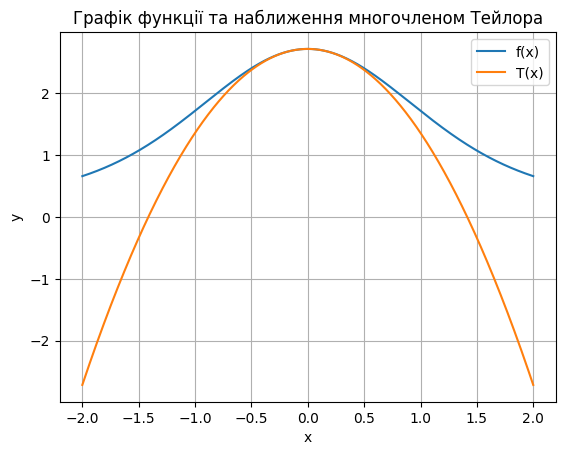

In [34]:
import sympy
import numpy
import matplotlib.pyplot as plt
import math

def diffgrade(fn, grade):
  if grade > 1:
    fn = sympy.diff(fn, x)
    grade -=1
    return diffgrade(fn, grade)
  else:
     return fn

x = sympy.symbols("x")
fx = sympy.exp(sympy.cos(x))

f1 = diffgrade(fx, 2)
f2 = diffgrade(fx, 3)
f3 = diffgrade(fx, 4)

print(f"f1 = {f1} \nf2 = {f2} \nf3 = {f3}")

x0 = 0

fx_val = fx.subs(x, x0).evalf()
f1_val = f1.subs(x, x0).evalf()
f2_val = f2.subs(x, x0).evalf()
f3_val = f3.subs(x, x0).evalf()

Tpol = fx_val + f1_val*(x-x0) + (f2_val/2)*(x-x0)**2 + (f3_val/6)*(x-x0)**3
print("f(0) =", fx_val)
print("T(x) =", Tpol.subs(x, x0).evalf())

x_vals = numpy.linspace(-2, 2, 1000)
f_vals = numpy.array([fx.subs(x, xi).evalf() for xi in x_vals])
T_vals = numpy.array([Tpol.subs(x, xi).evalf() for xi in x_vals])

fig, ax = plt.subplots()
ax.plot(x_vals, f_vals, label="f(x)")
ax.plot(x_vals, T_vals, label="T(x)")
ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Taylor polynome graph")
plt.grid(True)
plt.show()

taylor=         3         2
0.3144 x - 1.159 x - 0.1572 x + 2.718


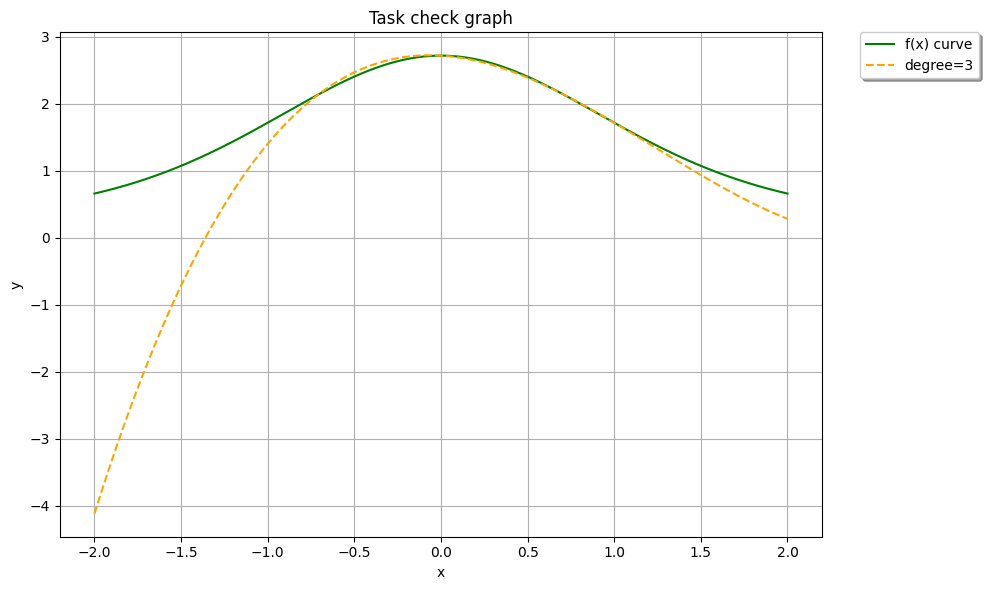

In [40]:
from scipy.interpolate import approximate_taylor_polynomial

def f(x):
    return numpy.exp(numpy.cos(x))

x = numpy.linspace(-2.0, 2.0, num=400)

plt.figure(figsize=(10, 6))
plt.plot(x, f(x), label="f(x) curve", color='green')

degree = 3

taylor = approximate_taylor_polynomial(f, 0, degree, 1)
print('taylor=', taylor)

plt.plot(x, taylor(x), label=f"degree={degree}", color='orange', linestyle='--' )
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',borderaxespad=0.0, shadow=True)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Task check graph")
plt.tight_layout()
plt.grid(True)
plt.show()